Let's import the libraries

In [2]:
import pandas as pd
import urllib.request
import re
import requests as requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

Here is the link : [fedweek](https://www.fedweek.com/pay-tables/2020-gs-pay-table-new-york-newark-ny-nj-ct-pa/)

In the link, there is a table and I want that on Python

In [3]:
firstUrl = 'https://www.fedweek.com/pay-tables/2020-gs-pay-table-new-york-newark-ny-nj-ct-pa/'
firstpage = urllib.request.urlopen(firstUrl).read()
soup = BeautifulSoup(firstpage,'html.parser')
table = soup.find('table')

Since we find the table, we have to extract the specifics such as the trs, ths and tds.

So we use lists and for loops to extract the texts from all these specifics.

In [4]:
first = []
for row in table.find_all("tr"):
    second = []
    for cell in row.find_all(["th","td"]):
        text = cell.text
        second.append(text)
    first.append(second)

We translate into a dataframe and now we make changes

In [5]:
salary = pd.DataFrame.from_dict(first)
salary.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Grade,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,Step 10
1,\n1\n,26184,27061,27932,28798,29669,30178,31038,31906,31941,32755
2,\n2\n,29441,30141,31117,31941,32300,33250,34200,35150,36100,37049
3,\n3\n,32123,33194,34264,35335,36405,37476,38546,39617,40687,41758
4,\n4\n,36061,37263,38464,39666,40868,42070,43272,44473,45675,46877


We have problems:

- First row needs to be a column
- We have these slashes on the 0th row

In [6]:
salary = salary.rename(columns=salary.iloc[0]).drop(salary.index[0])
salary.head()

,Grade,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,Step 10
1,\n1\n,26184,27061,27932,28798,29669,30178,31038,31906,31941,32755
2,\n2\n,29441,30141,31117,31941,32300,33250,34200,35150,36100,37049
3,\n3\n,32123,33194,34264,35335,36405,37476,38546,39617,40687,41758
4,\n4\n,36061,37263,38464,39666,40868,42070,43272,44473,45675,46877
5,\n5\n,40345,41691,43036,44381,45726,47071,48416,49762,51107,52452


So let's delete the grade column and replace using values from the index as shown on the table

In [7]:
del salary['Grade']

KeyError: 'Grade'

Why do we have an error?

Let's check the column names

In [8]:
salary.columns

Index([' Grade ', ' Step 1 ', ' Step 2 ', ' Step 3 ', ' Step 4 ', ' Step 5 ',
       ' Step 6 ', ' Step 7 ', ' Step 8 ', ' Step 9 ', ' Step 10 '],
      dtype='object')

There's white space on the columns so we have to strip that using a lambda function and then we can delete the grade column.

After we will reset the index as a new column which we will call Grade as shown on the table from the link.

In [9]:
salary = salary.rename(columns=lambda x: x.strip())
del salary['Grade']
salary = salary.reset_index().rename(columns={'index': 'Grade'})
salary.head()

,Grade,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,Step 10
0,1,26184,27061,27932,28798,29669,30178,31038,31906,31941,32755
1,2,29441,30141,31117,31941,32300,33250,34200,35150,36100,37049
2,3,32123,33194,34264,35335,36405,37476,38546,39617,40687,41758
3,4,36061,37263,38464,39666,40868,42070,43272,44473,45675,46877
4,5,40345,41691,43036,44381,45726,47071,48416,49762,51107,52452


Let's try to add numbers from every column

In [10]:
salary.sum()

Grade                                                    120
Step 1     2618429441321233606140345449734997655347611316...
Step 2     2706130141331943726341691464725164157192631696...
Step 3     2793231117342643846443036479725330759037652077...
Step 4     2879831941353353966644381494715497260882672457...
Step 5     2966932300364054086845726509705663762727692827...
Step 6     3017833250374764207047071524695830364572713207...
Step 7     3103834200385464327248416539685996866417733588...
Step 8     3190635150396174447349762554686163368261753968...
Step 9     3194136100406874567551107569676329970106774348...
Step 10    3275537049417584687752452584666496471951794728...
dtype: object

Numbers are supposed to be added, so what's happening?

Let's check our datatypes

In [11]:
salary.dtypes

Grade       int64
Step 1     object
Step 2     object
Step 3     object
Step 4     object
Step 5     object
Step 6     object
Step 7     object
Step 8     object
Step 9     object
Step 10    object
dtype: object

We only have one column with an integer type so we need to transform the entire dataframe to integer types.

In [12]:
salary = salary.apply(pd.to_numeric)
salary

ValueError: Unable to parse string "170800 *" at position 14

Seems that in our table, we have asterisks in our column values so we have to get rid of that and then make the whole dataframe numeric.

In [13]:
salary = salary.replace(["170800 *"],["170800"])
salary = salary.apply(pd.to_numeric)
salary.sum()

Grade          120
Step 1      982031
Step 2     1014489
Step 3     1047217
Step 4     1079788
Step 5     1111897
Step 6     1144085
Step 7     1171892
Step 8     1199706
Step 9     1226686
Step 10    1254445
dtype: int64

Now, our dataset is all numeric since we were able to use the sum function.

So, we have columns that can actually be column values.

If you've heard of tidy data from Hadley Wickham, the idea is to decrease the number of columns and increase the number of observations.

The reason specifically for this table is because I want to show an excellent plot that shows the change in grade over every step.

In [14]:
melt = pd.melt(salary,id_vars=['Grade'])
melt

,Grade,variable,value
0,1,Step 1,26184
1,2,Step 1,29441
2,3,Step 1,32123
3,4,Step 1,36061
4,5,Step 1,40345
...,...,...,...
145,11,Step 10,96149
146,12,Step 10,115251
147,13,Step 10,137045
148,14,Step 10,161939


We will make this dataframe much neater so you will see a more numerical analysis of what we have

In [15]:
group = melt.groupby(['Grade','variable']).sum()
group

value
Grade variable        
1     Step 1     26184
      Step 10    32755
      Step 2     27061
      Step 3     27932
      Step 4     28798
...                ...
15    Step 5    166068
      Step 6    170800
      Step 7    170800
      Step 8    170800
      Step 9    170800

[150 rows x 1 columns]

This is excellent, so now we have a numerical analysis of the corresponding value for every step for each grade regarding salary

Let's make this a visualization so you can enjoy what you see

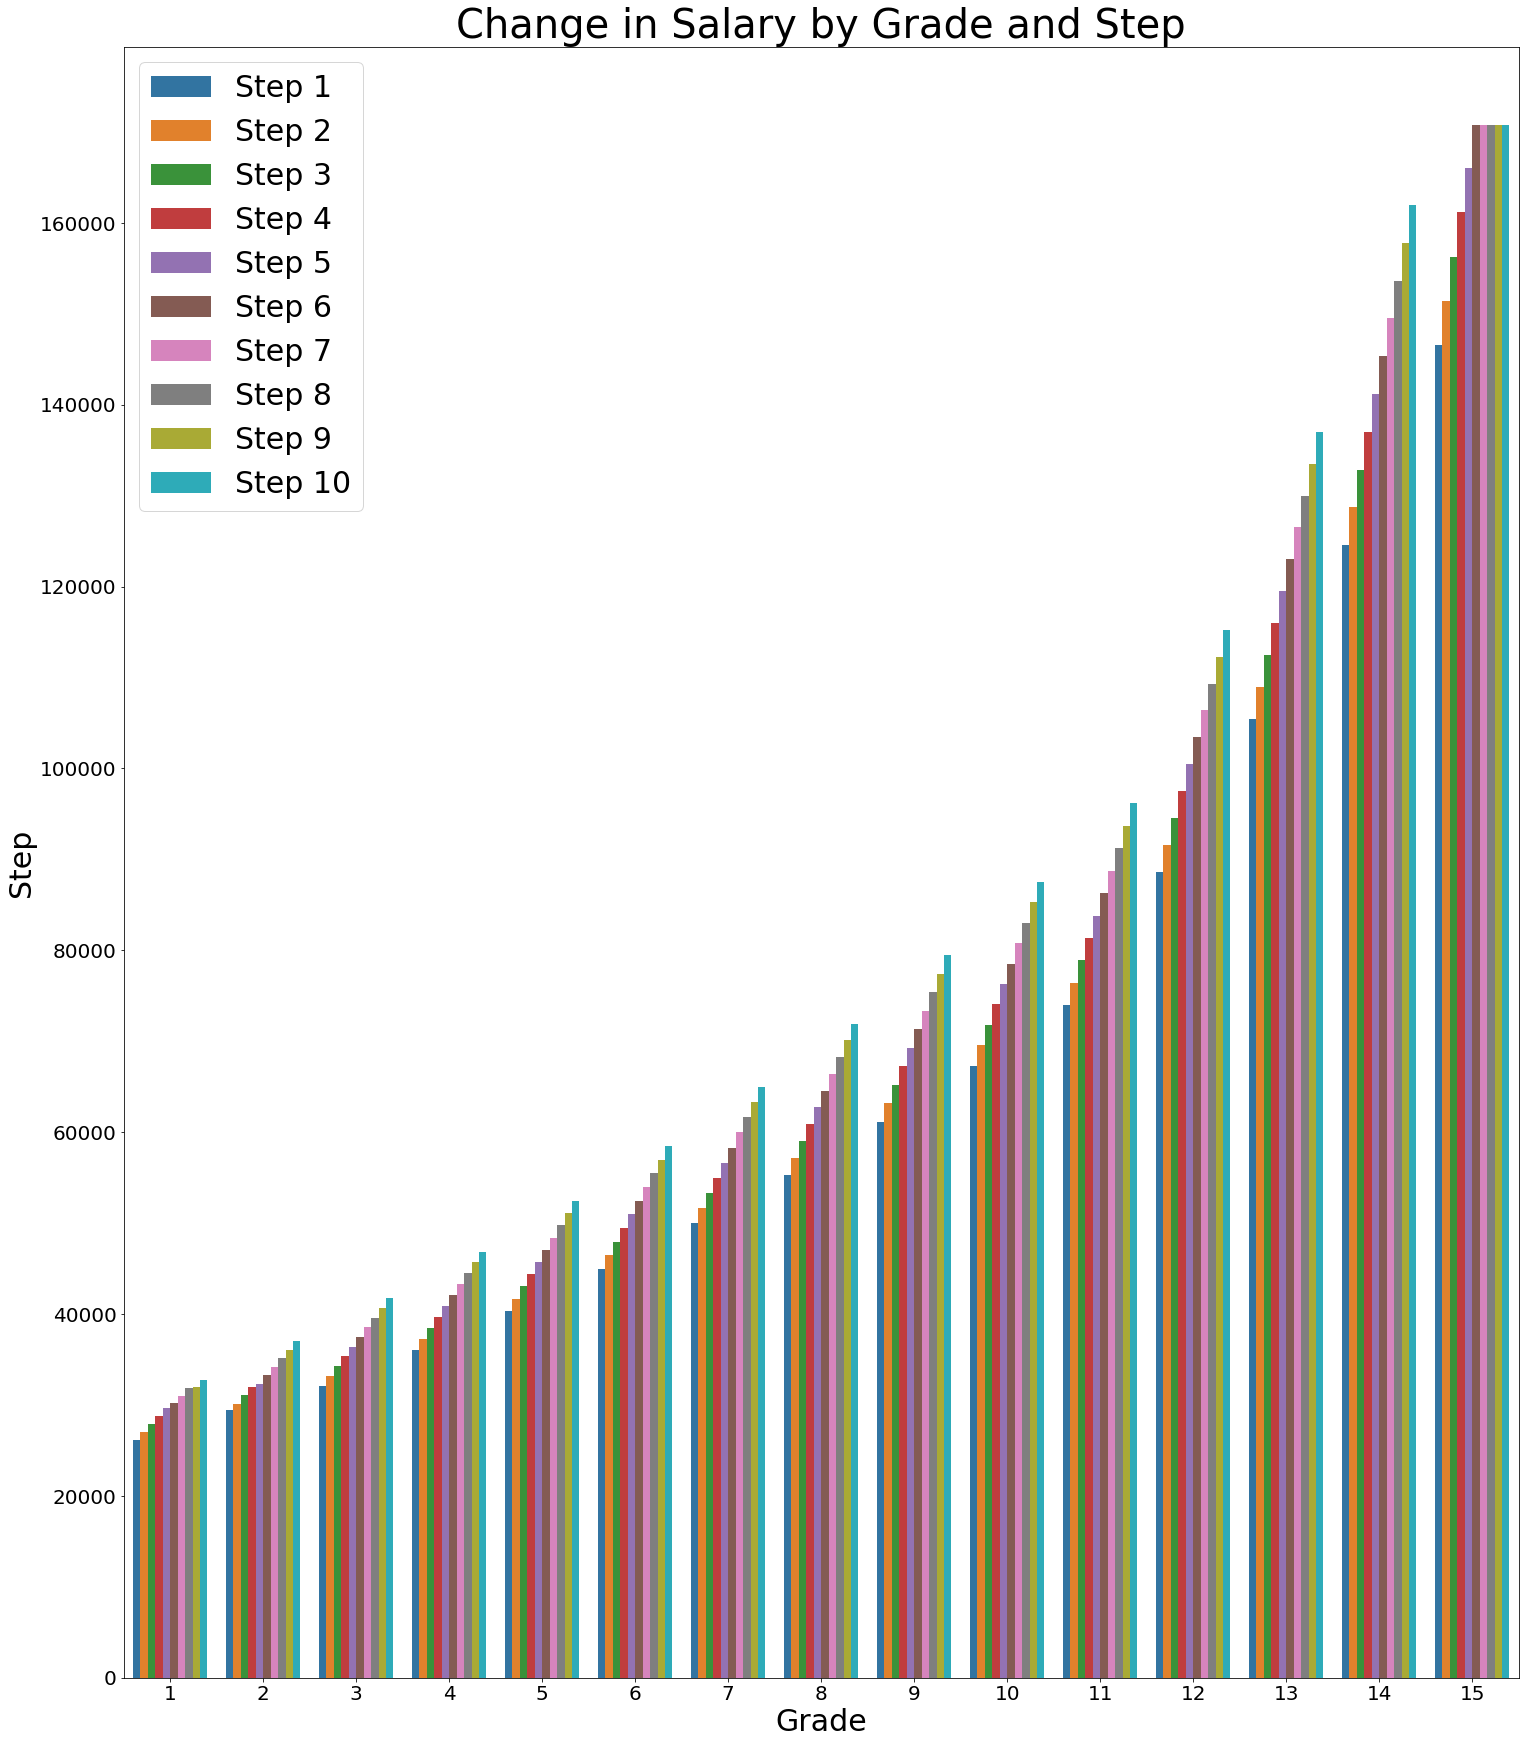

In [32]:
plt.figure(figsize=(25,30))
sns.barplot(data=melt,x='Grade',y='value',hue='variable')
plt.title('Change in Salary by Grade and Step',fontsize=40)
plt.xlabel('Grade',fontsize=30)
plt.ylabel('Step',fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=30)